In [1]:
# loading the packages
import numpy as np
# import mne
from tqdm import tqdm
# from tqdm import tqdm
import skfda
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import os

In [2]:
home_path = os.path.abspath(os.getcwd())
home_path

'c:\\Users\\User\\OneDrive\\Documenti\\Uni_nuovo\\Necst\\NL2project\\FDAxEEG\\Dataset'

In [3]:
canale = str(2)
banda = str(4)

In [4]:
# loading the data of ADHD
filename_adhd = home_path+"\ADHD_Matrici_medie\zona"+canale+"_p"+banda
mat = scipy.io.loadmat(filename_adhd)
PSD_ADHD=mat['avg']
df_Channel=pd.DataFrame(data=PSD_ADHD)
Channel_adhd=df_Channel.to_numpy(dtype=None, copy=False)
Channel_adhd = np.nan_to_num(Channel_adhd)

In [5]:
# loading the data of ADHD
filename_cont = home_path+"\Control_Matrici_medie\zona"+canale+"_p"+banda
mat = scipy.io.loadmat(filename_cont)
PSD_ADHD=mat['avg']
df_Channel=pd.DataFrame(data=PSD_ADHD)
Channel_cont=df_Channel.to_numpy(dtype=None, copy=False)
Channel_cont = np.nan_to_num(Channel_cont)

In [6]:
xx = np.linspace(0,64,60)

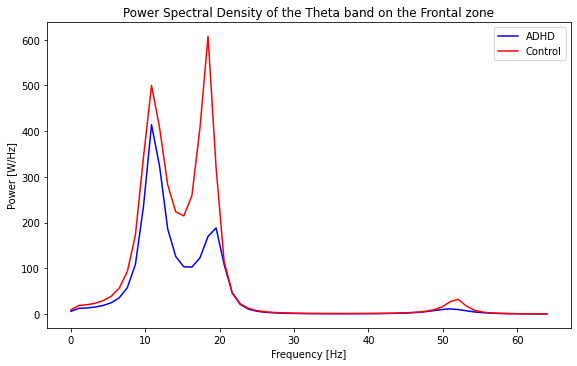

In [7]:
plt.figure(figsize=(8,5))
plt.title("Power Spectral Density of the Frontal zone signal in the Theta band on ")
plt.tight_layout()
plt.plot(xx,Channel_adhd[5,0:60], 'b')   
plt.plot(xx,Channel_cont[5,0:60], 'r') 
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [W/Hz]')
plt.legend(['ADHD','Control'])

In [8]:

ADHD=skfda.FDataGrid(data_matrix=Channel_adhd)
ADHD.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

Control=skfda.FDataGrid(data_matrix=Channel_cont)
Control.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)


In [49]:
toplot_adhd = ADHD.data_matrix[5]
toplot_cont = Control.data_matrix[5]

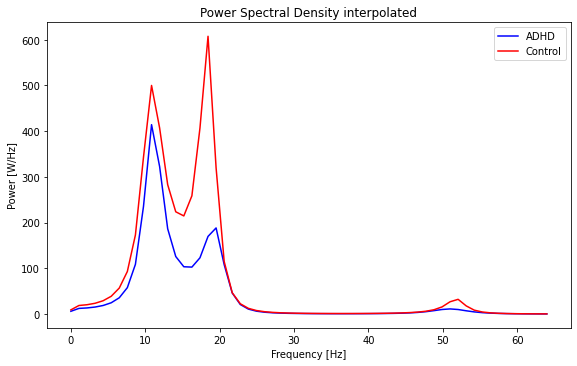

In [59]:
plt.figure(figsize=(8,5))
plt.title("Power Spectral Density interpolated")
plt.tight_layout()
plt.plot(xx,toplot_adhd[0:60], 'b')   
plt.plot(xx,toplot_cont[0:60], 'r') 
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [W/Hz]')
plt.legend(['ADHD','Control'])